<a href="https://colab.research.google.com/github/kimalaacer/PyTorch-for-Deep-Learning-and-Computer-Vision/blob/master/Linear_Regression_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

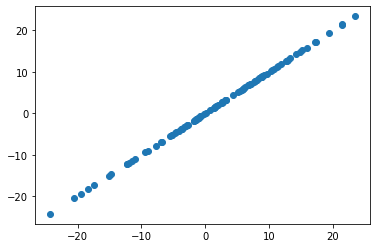

In [2]:
x = torch.randn(100,1)*10
y= x
plt.plot(x, y, 'o')

we need to add noise 

In [0]:
y= x + torch.randn(100, 1)*3

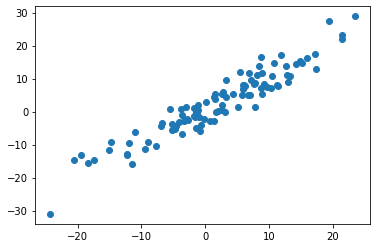

In [4]:
plt.plot(x, y, 'o')

to prevent errors, it is better to transform to numpy from tensor befroe plotting.


Text(0, 0.5, 'y')

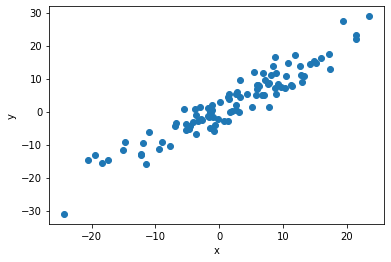

In [5]:
plt.plot(x.numpy(), y.numpy(), 'o')
plt.xlabel('x')
plt.ylabel('y')

In [0]:
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
 # we use super to inherit from class
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    pred = self.linear(x)
    return pred

In [0]:
torch.manual_seed(1)
model = LR(1,1)

In [0]:
[w, b] = model.parameters()

In [9]:
print(w, b)

Parameter containing:
tensor([[0.5153]], requires_grad=True) Parameter containing:
tensor([-0.4414], requires_grad=True)


in first tensor, notice the double brackets for 2-d


In [10]:
w1 = w[0][0]
b1 = b[0]
print(w1, b1)

tensor(0.5153, grad_fn=<SelectBackward>) tensor(-0.4414, grad_fn=<SelectBackward>)


if we use the .item we can obtain the python number.


In [0]:
def get_params():
  return (w[0][0].item(), b[0].item())


In [0]:
def plot_fit(title):
  plt.title = title
  w1, b1 = get_params()
  x1 = np.array([-30, 30])
  y1= w1 * x1 + b1
  plt.plot(x1, y1, 'r')
  plt.scatter(x, y)

In [0]:
plt.show()

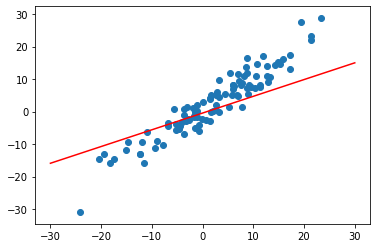

In [14]:
plot_fit('initial model')

the line does not exactly represent the dots, so we need to use gradient descent to make it align better. 


we need to minimize the loss function
we can access the loss function built-in pytorch by nn.MSEloss

In [0]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [16]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(x)
  loss = criterion(y_pred, y)
  print("epoch:", i, "loss:", loss.item())
  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



epoch: 0 loss: 34.698341369628906
epoch: 1 loss: 32.80893325805664
epoch: 2 loss: 31.06729507446289
epoch: 3 loss: 29.461772918701172
epoch: 4 loss: 27.981647491455078
epoch: 5 loss: 26.617046356201172
epoch: 6 loss: 25.3588809967041
epoch: 7 loss: 24.198768615722656
epoch: 8 loss: 23.1290340423584
epoch: 9 loss: 22.142568588256836
epoch: 10 loss: 21.232826232910156
epoch: 11 loss: 20.393781661987305
epoch: 12 loss: 19.619884490966797
epoch: 13 loss: 18.90602684020996
epoch: 14 loss: 18.247507095336914
epoch: 15 loss: 17.639978408813477
epoch: 16 loss: 17.079442977905273
epoch: 17 loss: 16.562227249145508
epoch: 18 loss: 16.08493995666504
epoch: 19 loss: 15.644453048706055
epoch: 20 loss: 15.237903594970703
epoch: 21 loss: 14.862624168395996
epoch: 22 loss: 14.516170501708984
epoch: 23 loss: 14.19630241394043
epoch: 24 loss: 13.9009428024292
epoch: 25 loss: 13.628190040588379
epoch: 26 loss: 13.376274108886719
epoch: 27 loss: 13.143577575683594
epoch: 28 loss: 12.92860221862793
epoch: 

Text(0.5, 0, 'Epoch')

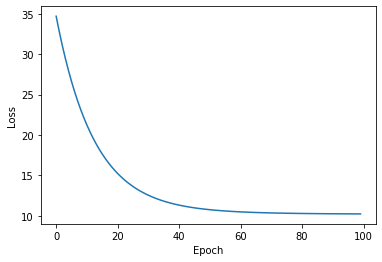

In [17]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')


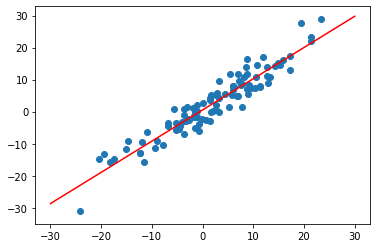

In [18]:
plot_fit("Trained Model")